In [189]:
import numpy as np
import sympy as sp
import torch
sp.init_printing()

In [3]:
    for val in eigenvalues:
        dig = np.zeros_like(M)
        np.fill_diagonal(dig, val)
        print('determinant', np.linalg.det(M - dig))

In [ ]:
.eigenvals()
        #print(np.around(M @ eigenvectors[:,i] - eigenvalues[i] * eigenvectors[:,i], 3))
        print(M @ np.around(eigenvectors[:,i], 3))


In [1592]:

def get_sigma_matrix(M):
    '''
    returns sigma and 
    1) in case MMT -> U
    2) in case MTM -> V
    '''
    
    eigenvalues, eigenvectors = np.linalg.eig(M)
    sort_eigenvalues = np.sort(eigenvalues)[::-1]
    indexes = np.argsort(eigenvalues)[::-1]
    Sigma = np.sqrt(sort_eigenvalues)
    matrix = eigenvectors[:,indexes]

    return Sigma, matrix


def custom_SVD(M):
    '''
    returns U, Sigma(vector), V^T
    '''
    if(len(M.shape) < 2):
        M = np.array([M])
    MTM = np.transpose(M) @ M
    MMT = M @ np.transpose(M)
    # m x n  

        
    if (M.shape[0] < M.shape[1]):
        # m < n
        Sigma, V = get_sigma_matrix(MTM)
        U = []
        for i in range(M.shape[0]):
            if Sigma[i] != 0:
                Ui = (M @ V[:,i]) / Sigma[i]
            else:
                Ui = M @ V[:,i]
            
            U.append(Ui)
        U = np.array(U).transpose()
    else:
        # n <= m
        Sigma, U = get_sigma_matrix(MMT)
        V = []
        for i in range(M.shape[1]):
            if(Sigma[i] != 0):
                Vi = (M.transpose() @ U[:,i]) / Sigma[i]
            else:
                Vi = M.transpose() @ U[:,i]
            V.append(Vi)
        V = np.array(V)
    return U, Sigma, V.transpose()
    


In [1622]:
def get_full_sigma(Sigma, A):
    if(len(A.shape) < 2):
        A = np.array([A]) 
    result = np.zeros(A.shape)
    for i in range(np.min(A.shape)):
        result[i][i] = Sigma[i]
    return result

In [1623]:
A = np.array([[1, 0, 0, 0, 5],
              [0, 1, 0, 2, 0],
              [0, 0, 4, 0, 0],
              [0, 7, 0, 0, 9]])

In [1624]:
U, Sigma, V = np.linalg.svd(A, full_matrices=True)

In [1625]:
print(np.around(U, 3))
print(np.around(Sigma, 3))
print(np.around(V, 3))

[[-0.348  0.     0.866  0.36 ]
 [-0.046 -0.    -0.399  0.916]
 [ 0.     1.     0.     0.   ]
 [-0.936  0.    -0.302 -0.179]]
[12.127  4.     3.209  1.906]
[[-0.029 -0.544  0.    -0.008 -0.838]
 [ 0.     0.     1.     0.     0.   ]
 [ 0.27  -0.783  0.    -0.249  0.502]
 [ 0.189 -0.177  0.     0.961  0.099]
 [-0.944 -0.243 -0.     0.121  0.189]]


In [1626]:
np.around(U @ get_full_sigma(Sigma, A) @ V, 3)

array([[ 1.,  0.,  0.,  0.,  5.],
       [ 0.,  1.,  0.,  2.,  0.],
       [ 0.,  0.,  4.,  0.,  0.],
       [-0.,  7.,  0., -0.,  9.]])

In [1627]:
U, Sigma, V = custom_SVD(A)

In [1628]:
print(np.around(U, 3))
print(np.around(Sigma, 3))
print(np.around(V, 3))

[[-0.348  0.    -0.866  0.36 ]
 [-0.046  0.     0.399  0.916]
 [ 0.     1.     0.     0.   ]
 [-0.936  0.     0.302 -0.179]]
[12.127  4.     3.209  1.906  0.   ]
[[-0.029 -0.544  0.    -0.008 -0.838]
 [ 0.     0.     1.     0.     0.   ]
 [-0.27   0.783  0.     0.249 -0.502]
 [ 0.189 -0.177  0.     0.961  0.099]
 [ 0.944  0.243  0.    -0.121 -0.189]]


In [1629]:
np.around(U @ get_full_sigma(Sigma, A) @ V, 3)

array([[ 1.,  0.,  0., -0.,  5.],
       [-0.,  1.,  0.,  2.,  0.],
       [ 0.,  0.,  4.,  0.,  0.],
       [ 0.,  7.,  0.,  0.,  9.]])

In [1630]:
def test_svd(A):
    U, Sigma, V = custom_SVD(A)
    if len(U) > 0:
        assert(np.around(U @ get_full_sigma(Sigma, A) @ V, 3).all() == A.all())
    print('ok')

In [1631]:

test_svd(np.array([[1, 0], [1, 0], [102,9]]))
test_svd(np.array([[3, 4, 10, -20], [5, 0, 5.5, 0], [0, 0, 1, 0]]))
test_svd(np.array([[0,0,0],[0,0,0]]))
test_svd(np.array([0,0]))

ok
ok
ok
ok


<ipython-input-1592-511c13ac7455>:10: RuntimeWarning: invalid value encountered in sqrt
  Sigma = np.sqrt(sort_eigenvalues)


In [1362]:
A = np.array([[3, 4, 10, -20, 7]])
A

array([[  3,   4,  10, -20,   7]])

In [1236]:
U, Sigma, V = custom_SVD(A)
np.around(U @ get_full_sigma(Sigma, A) @ V, 3)

<ipython-input-1185-865a46cc1121>:10: RuntimeWarning: invalid value encountered in sqrt
  Sigma = np.sqrt(sort_eigenvalues)


array([[  3. ,   4. ,  10. , -20. ,   7. ],
       [  5. ,   0. ,   5.5,  -0. ,   3. ]])

In [1237]:
A = np.array([[3, 4, 10, -20, 7],[5,0,5.5,0,3]]).transpose()
A

array([[  3. ,   5. ],
       [  4. ,   0. ],
       [ 10. ,   5.5],
       [-20. ,   0. ],
       [  7. ,   3. ]])

In [1238]:
U, Sigma, V = custom_SVD(A)
np.around(U @ get_full_sigma(Sigma, A) @ V, 3)

<ipython-input-1185-865a46cc1121>:10: RuntimeWarning: invalid value encountered in sqrt
  Sigma = np.sqrt(sort_eigenvalues)


array([[  3. ,   5. ],
       [  4. ,  -0. ],
       [ 10. ,   5.5],
       [-20. ,   0. ],
       [  7. ,   3. ]])

In [1239]:
A = np.array([[1,0,0,0],[0,0,0,0],[0,0,0,0]])
A

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [1217]:
U, Sigma, V = custom_SVD(A)
np.around(U @ get_full_sigma(Sigma, A) @ V, 3)

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [1218]:
custom_SVD(A)

(array([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([1., 0., 0., 0.]),
 array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]]))

$A = U * \Sigma * V^{T} $

In [264]:
U @ get_full_sigma(Sigma, A) @ V

array([[ 0.74098192,  0.24215361,  0.        , -1.31813548,  4.86362275],
       [-0.65906774,  1.61615633,  0.        , -1.35397657, -0.34700992],
       [ 0.        ,  0.        ,  4.        ,  0.        ,  0.        ],
       [ 0.12874591,  6.87963664,  0.        ,  0.65518418,  9.06778682]])

In [251]:
B = np.array([[1,0,1],[0,1,1]])
U, sigma, V  = np.linalg.svd(B)
np.linalg.svd(B)

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([1.73205081, 1.        ]),
 array([[ 4.08248290e-01,  4.08248290e-01,  8.16496581e-01],
        [-7.07106781e-01,  7.07106781e-01,  2.78178085e-16],
        [-5.77350269e-01, -5.77350269e-01,  5.77350269e-01]]))

In [252]:
U @ getFullSigma(sigma, B) @ V

array([[ 1.00000000e+00, -1.11022302e-16,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [253]:
U, sigma, V  = custom_SVD(B)
custom_SVD(B)

<ipython-input-245-a79864595b5b>:10: RuntimeWarning: invalid value encountered in sqrt
  Sigma = np.sqrt(sort_eigenvalues)


(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([1.73205081, 1.        ]),
 array([[-4.08248290e-01, -4.08248290e-01, -8.16496581e-01],
        [-7.07106781e-01,  7.07106781e-01, -2.61239546e-16],
        [-5.77350269e-01, -5.77350269e-01,  5.77350269e-01]]))

In [255]:
U @ getFullSigma(sigma, B) @ V

array([[ 2.77555756e-16, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.11022302e-16, -1.00000000e+00]])

In [440]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.datasets
import matplotlib.pyplot as plt
transformToTensor = transforms.Compose([transforms.PILToTensor()])
dataset = torchvision.datasets.ImageFolder('./vggface2_test/vggface2_test/test/', transform=transformToTensor)
U, sigma, V = np.linalg.svd(dataset[0][0])

C:\Users\Zhekuson\anaconda3\lib\site-packages\torchvision\transforms\functional.py:109: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  img = torch.as_tensor(np.asarray(pic))


In [508]:
dataset[1000]

(tensor([[[195, 195, 195,  ..., 172, 126,  76],
          [195, 195, 195,  ..., 178, 155, 104],
          [195, 195, 195,  ..., 182, 186, 131],
          ...,
          [197, 197, 198,  ...,  23,  24,  21],
          [196, 197, 197,  ...,  23,  24,  22],
          [196, 196, 197,  ...,  23,  24,  22]],
 
         [[186, 186, 186,  ..., 135, 127,  66],
          [186, 186, 186,  ..., 140, 152,  91],
          [186, 186, 186,  ..., 138, 177, 116],
          ...,
          [192, 192, 193,  ...,  23,  24,  21],
          [191, 192, 192,  ...,  23,  24,  22],
          [191, 191, 192,  ...,  23,  24,  22]],
 
         [[181, 181, 181,  ..., 126, 109,  57],
          [181, 181, 181,  ..., 131, 135,  83],
          [181, 181, 181,  ..., 129, 162, 109],
          ...,
          [188, 188, 189,  ...,  23,  24,  23],
          [187, 188, 188,  ...,  23,  24,  24],
          [187, 187, 188,  ...,  23,  24,  24]]], dtype=torch.uint8),
 2)

In [367]:
print(U.shape)
print(sigma.shape)
print(V.shape)

(3, 227, 227)
(3, 199)
(3, 199, 199)


In [374]:
sigma

array([[3.19966534e+04, 4.43129852e+03, 2.93165292e+03, 2.29041312e+03,
        1.90093607e+03, 1.54173555e+03, 1.45162786e+03, 1.24009914e+03,
        1.14023826e+03, 1.05934192e+03, 9.15614403e+02, 8.60522510e+02,
        7.51254866e+02, 7.13485264e+02, 6.63225961e+02, 6.13284646e+02,
        5.82325048e+02, 5.43339220e+02, 4.81084694e+02, 4.46516863e+02,
        4.41542764e+02, 4.37685252e+02, 3.87061296e+02, 3.76663438e+02,
        3.63588106e+02, 3.52877491e+02, 3.45301540e+02, 3.25858152e+02,
        3.18187560e+02, 3.02946926e+02, 2.96258038e+02, 2.66478695e+02,
        2.48995677e+02, 2.34056802e+02, 2.27239563e+02, 2.20355350e+02,
        2.09978104e+02, 2.04565562e+02, 1.94474379e+02, 1.85469459e+02,
        1.81048972e+02, 1.75122544e+02, 1.68814272e+02, 1.57482236e+02,
        1.48205038e+02, 1.46100746e+02, 1.43937035e+02, 1.35398579e+02,
        1.30734230e+02, 1.26396926e+02, 1.21132340e+02, 1.17099409e+02,
        1.13786215e+02, 1.06139516e+02, 1.03772944e+02, 1.011466

In [437]:
def get_full_sigma_3d(sigma, shape):
    '''
    returns sigma matrix with zeros (C x W x H)
    '''
    result = np.zeros((3,shape[0],shape[1]))
    size = np.min([shape])
    for channel in range(sigma.shape[0]):
        for i in range(size):
            result[channel][i][i] = sigma[channel][i]
    return result
def recreate_image(U, sigma, Vt):
    '''
    input: C x W x H 
    returns image (W x H x C) (int type, PIL)
    '''
    sigma1 = get_full_sigma_3d(sigma, (U.shape[1], Vt.shape[1]))
    img = np.array(U @ sigma1 @ V, dtype=int)
    return np.transpose((img), axes = (1, 2, 0))

In [438]:
def make_zeros(sigma, count_zeros = 0):
    '''
    input: sigma (C x min(W, H))
    output: sigma with zeros (C x min(W, H))
    '''
    size = sigma.shape[1]
    for channel in range(sigma.shape[0]):
        for i in range(size - 1, size - count_zeros, -1):
            sigma[channel][i] = 0
    return sigma

In [570]:
U, sigma, V = np.linalg.svd(dataset[1052][0])

In [574]:
sigma = make_zeros(sigma, count_zeros=357)

In [575]:
img = recreate_image(U, sigma, V)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


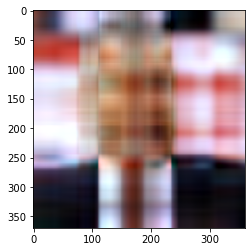

In [576]:
plt.imshow(img)

In [634]:
def make_value(sigma, value, first_count):
    '''
    input: sigma (C x min(W, H))
    '''
    size = sigma.shape[1]
    for channel in range(sigma.shape[0]):
        for i in range(first_count):
            sigma[channel][i] = value
    return sigma

In [621]:
U, sigma, V = np.linalg.svd(dataset[1052][0])

In [622]:
sigma = make_value(sigma, 100,1)

In [623]:
img = recreate_image(U, sigma, V)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


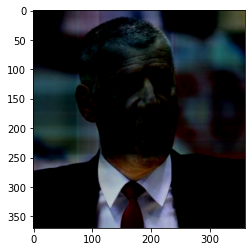

In [624]:
plt.imshow(img)

In [635]:
def make_concrete_value(sigma, value, position):
    '''
    input: sigma (C x min(W, H))
    '''
    size = sigma.shape[1]
    for channel in range(sigma.shape[0]):
        sigma[channel][position] = value
    return sigma

In [1605]:
U, sigma, V = np.linalg.svd(dataset[1052][0])

In [1606]:
sigma = make_concrete_value(sigma, 10, 25)

In [1607]:
img = recreate_image(U, sigma, V)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


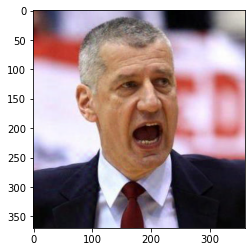

In [688]:
plt.imshow(img)

In [474]:


image = Image.open('./vggface2_test/vggface2_test/test/n000001/0001_01.jpg')

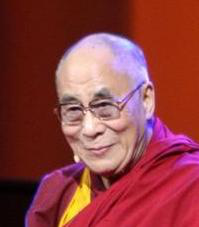

In [475]:
image

In [492]:
U, sigma1, V = np.linalg.svd(dataset[1][0])

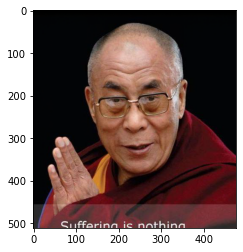

In [498]:
img = recreate_image(U, sigma1, V)
plt.imshow(img)

In [505]:
(sigma1[:,:199])

array([[45108.81726258, 20184.64297741,  9674.77402735,  6376.9103762 ,
         5282.42768126,  4486.39938883,  3917.93359827,  3522.14986371,
         3298.42784393,  2886.77618972,  2619.98768477,  2604.93989235,
         2289.75170471,  2184.82071955,  2056.0740655 ,  1890.9122347 ,
         1816.02414851,  1592.31239623,  1498.20143455,  1456.33412584,
         1442.75313238,  1384.63919349,  1264.23574569,  1222.55779251,
         1173.93952333,  1149.68525617,  1133.30964739,  1038.03008874,
          976.30338059,   964.8196448 ,   938.257656  ,   920.58382251,
          873.93669467,   834.48662885,   805.60877401,   778.25437088,
          755.01816211,   746.76983754,   706.49488459,   679.82982222,
          661.63287531,   643.52523345,   638.49251198,   617.88833313,
          602.71091191,   584.25496023,   567.76999268,   553.6037762 ,
          530.13338289,   515.98171648,   507.88175859,   491.59449727,
          481.70149039,   469.02887077,   461.3561614 ,   435.56

In [506]:
sigma

array([[3.19966534e+04, 4.43129852e+03, 2.93165292e+03, 2.29041312e+03,
        1.90093607e+03, 1.54173555e+03, 1.45162786e+03, 1.24009914e+03,
        1.14023826e+03, 1.05934192e+03, 9.15614403e+02, 8.60522510e+02,
        7.51254866e+02, 7.13485264e+02, 6.63225961e+02, 6.13284646e+02,
        5.82325048e+02, 5.43339220e+02, 4.81084694e+02, 4.46516863e+02,
        4.41542764e+02, 4.37685252e+02, 3.87061296e+02, 3.76663438e+02,
        3.63588106e+02, 3.52877491e+02, 3.45301540e+02, 3.25858152e+02,
        3.18187560e+02, 3.02946926e+02, 2.96258038e+02, 2.66478695e+02,
        2.48995677e+02, 2.34056802e+02, 2.27239563e+02, 2.20355350e+02,
        2.09978104e+02, 2.04565562e+02, 1.94474379e+02, 1.85469459e+02,
        1.81048972e+02, 1.75122544e+02, 1.68814272e+02, 1.57482236e+02,
        1.48205038e+02, 1.46100746e+02, 1.43937035e+02, 1.35398579e+02,
        1.30734230e+02, 1.26396926e+02, 1.21132340e+02, 1.17099409e+02,
        1.13786215e+02, 1.06139516e+02, 1.03772944e+02, 1.011466

In [ ]:
np.empty()

In [597]:
class SVDtransform(object):
    def __call__(self, sample):
        image, label = sample[0], sample[1]
        U, sigma, V = np.linalg.svd(image)
        return sigma

In [598]:
import torch.nn as nn
from tqdm import tqdm

In [599]:
faces_count = 68
class SVDModel(nn.Module):
    def __init__(self):
        super(SVDModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512,3*512),
            nn.ReLU(),
            nn.Linear(3*512,faces_count)
        )

    def forward(self, x):
        return self.model.forward(x)

In [600]:
train_transform = transforms.Compose([transforms.Resize(512), transforms.PILToTensor(), SVDtransform()])
test_transform = transforms.Compose([transforms.Resize(512), transforms.PILToTensor(), SVDtransform()])
train_dataset = torchvision.datasets.ImageFolder('./train/', transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder('./test/', transform=test_transform)

In [601]:
train_dataloader = DataLoader(train_dataset, batch_size = 100, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = 10, shuffle = True)

In [602]:
def train_model_one_epoch(model, dataloader, criterion, optimizer):
    #code here
    for images, labels in tqdm(dataloader):
        y_pred = model.forward(images.float())
        loss = criterion(y_pred,labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
def test_model(model, dataloader):
    model = model
    n = 0
    right = 0
    for images, labels in dataloader:
        images = images
        labels = labels
        y_pred = model.forward(images.float())
        for i in range(len(images)):
            if (torch.argmax(y_pred[i]) == labels[i]):
                right += 1
        n += len(images)  
        break
    return right/n
def train_model(model, train_dataloader, test_dataloader, criterion, optimizer, n_epochs = 10):
    for i in tqdm(range(n_epochs)):
        train_model_one_epoch(model, train_dataloader, criterion, optimizer)
        print(test_model(model, test_dataloader))

In [603]:
model = SVDModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train_model(model, train_dataloader, test_dataloader, criterion, optimizer)

  0%|          | 0/216 [00:00<?, ?it/s]

0.0



  0%|          | 0/216 [00:00<?, ?it/s]

0.0



 20%|██        | 2/10 [1:21:12<5:24:48, 2436.02s/it]


KeyboardInterrupt: 

In [592]:
print(model.forward(torch.tensor([test_dataset[0][0], test_dataset[1][0]]).float()))



tensor([[511.7074, 211.8152, 787.4515,  ..., -49.0878,  -7.0563,  12.1165],
        [ 11.1106,   4.6145,  14.9017,  ...,   9.4309, -13.6429,  10.4805]],
       grad_fn=<AddmmBackward>)


In [590]:
test_model(model, test_dataloader)

0.0

In [595]:
print(model.forward(torch.tensor([test_dataset[500][0], test_dataset[1][0]]).float()))
print(test_dataset[500][1])

tensor([[427.4058, 163.3078, 636.9193,  ..., -62.5718, -16.4241, -39.5113],
        [ 11.1106,   4.6145,  14.9017,  ...,   9.4309, -13.6429,  10.4805]],
       grad_fn=<AddmmBackward>)
1
